In [113]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic scaling
import pandas as pd
# from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')

In [6]:
#MODIS Functions

def plot_ship_tracks_chla_with_backtraj(dataframes, lon_col, lat_col, colors, vmax_value, labels, heatmap_df, trajectory_df, title="Track Plot", xlim=None, ylim=None):
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()}, facecolor='white')

    # Create a meshgrid for the heatmap
    lon = heatmap_df.columns.values.astype(float)
    lat = heatmap_df.index.values.astype(float)
    Lon, Lat = np.meshgrid(lon, lat)
    heatmap_values = heatmap_df.values

    # Plot the heatmap with log scale normalization
    heatmap = ax.pcolormesh(Lon, Lat, heatmap_values, shading='auto', cmap='viridis', 
                            norm=LogNorm(vmin=1, vmax=vmax_value), transform=ccrs.PlateCarree())
    cbar = fig.colorbar(heatmap, ax=ax, orientation='vertical', pad=0.05, aspect=50)
    cbar.set_label('MODIS Chl a ($\mu g/L$)')

    # Customize the color bar ticks
    cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{float(x):.2f}'))
    
    # Plot the ship tracks
    for df, color, label in zip(dataframes, colors, labels):
        latitudes = df[lat_col]
        longitudes = df[lon_col]
        mask = latitudes > -62
        ax.scatter(longitudes[mask], latitudes[mask], s=5, color=color, label=label,  transform=ccrs.PlateCarree())
    
    # Colour ice edge scatter differently
    # ax.scatter(longitudes[~mask], latitudes[~mask], s=10, color='grey', label='MISO Antarctic Ice-Edge Leg (N/A)', transform=ccrs.PlateCarree())
    
    # Plot the trajectory data
    ax.plot(trajectory_df['lon'], trajectory_df['lat'], color='black', label='24-hr backtraj', transform=ccrs.PlateCarree(), linewidth=0.5, alpha=0.7)

    # Add gridlines and labels
    ax.gridlines(draw_labels=True)
    ax.coastlines()

    # Set x and y limits
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)

    # Set the title and legend
    ax.set_title(title, fontsize=16)
    ax.legend()

    plt.show()

def preprocess_chlorophyll_data(file_path, lon_min=100, lon_max=155, lat_min=-63, lat_max=-30):
    """
    Preprocesses the chlorophyll data from a CSV file. Note that data from MODIS is in mg/m3 which is equal to ug/L which is what is reported.

    Parameters:
    file_path (str): The path to the CSV file.
    lon_min (float): Minimum longitude value to keep.
    lon_max (float): Maximum longitude value to keep.
    lat_min (float): Minimum latitude value to keep.
    lat_max (float): Maximum latitude value to keep.
    replace_value (int or float): The value to replace with NaN.
    conversion_factor (float): Factor to convert the data values.

    Returns:
    pd.DataFrame: The preprocessed chlorophyll data.
    """
    # Read the CSV file
    chla_data = pd.read_csv(file_path)
    
    # Set the 'lat/lon' column as the index
    chla_data = chla_data.set_index('lat/lon')
    
    # Replace specific value with NaN
    chla_data = chla_data.replace(99999, np.nan)
    
    # Ensure columns are floats
    chla_data.columns = [float(x) for x in chla_data.columns]
    
    # Keep only the columns within the specified longitude range
    columns_to_keep = [x for x in chla_data.columns if lon_min < x < lon_max]
    chla_data = chla_data[columns_to_keep]
    
    # Keep only the rows within the specified latitude range
    chla_data = chla_data[(chla_data.index > lat_min) & (chla_data.index < lat_max)]
    
    return chla_data

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/var/folders/fr/vt6pjv5j2xd3yldcz7dyxj2c0000gn/T/ipykernel_19409/2087484628.py:16: SyntaxWarning: invalid escape sequence '\m'
  cbar.set_label('MODIS Chl a ($\mu g/L$)')


In [101]:
# files downloaded from https://neo.gsfc.nasa.gov/view.php?datasetId=MY1DMM_CHLORA&date=2024-11-24 as CSV files for excel (0.1deg resolution)

chla = preprocess_chlorophyll_data('/Users/alanahc/Documents/Conferences/Cape-K/MY1DMM_CHLORA_2024-11-01_rgb_3600x1800.SS.CSV', lon_min=100, lon_max=155, lat_min=-63, lat_max=-30)

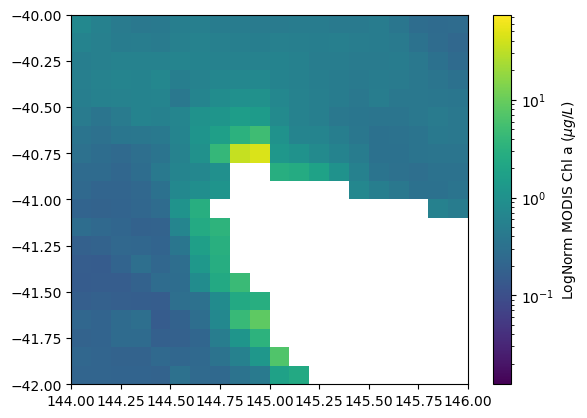

In [116]:
lon = np.array(chla.columns.values)
lat = np.array(chla.index.values)
lat_grid,lon_grid = np.meshgrid(lon, lat)
chla_values = chla.iloc[0:, 0:].values

cf = plt.pcolormesh(lat_grid, lon_grid, chla_values,cmap='viridis',norm=LogNorm())
plt.colorbar(cf,label='LogNorm MODIS Chl a ($\mu g/L$)')
plt.ylim(-42, -40)
plt.xlim(144, 146)
plt.show()